IMPORT AND SET UP

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')

In [189]:
# import data

loans = pd.read_csv('loan_data.csv')

In [190]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [191]:
# summary 

loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


This data has 9578 rows and no null entry.

# TIPS

- credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise. <br/>
- purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").<br/>
- int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates. <br/>
- installment: The monthly installments owed by the borrower if the loan is funded. <br/>
- log.annual.inc: The natural log of the self-reported annual income of the borrower.<br/>
- dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income). <br/>
- fico: The FICO credit score of the borrower.<br/>
- days.with.cr.line: The number of days the borrower has had a credit line. <br/>
- revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle). <br/>
- revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).<br/>
- inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.<br/>
- delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.<br/>
- pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).<br/>


In [192]:
# statistical summary

loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


EXPLORATORY DATA ANALYSIS

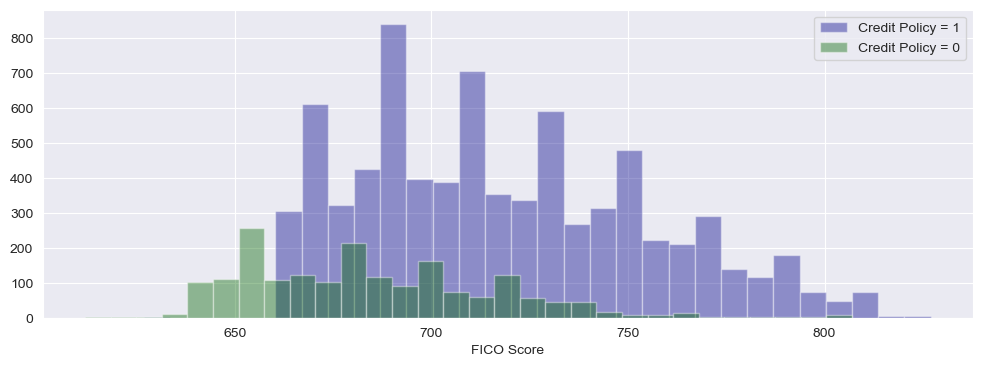

In [193]:
# distribution of FICO credit score by credit policy

plt.figure(figsize=(12,4))
plt.hist(loans[loans['credit.policy']==1]['fico'], color='darkblue', alpha=0.4, bins=30, 
         label='Credit Policy = 1')
plt.hist(loans[loans['credit.policy']==0]['fico'], color='darkgreen', alpha=0.4, bins=30, 
         label='Credit Policy = 0')
plt.xlabel('FICO Score')
plt.legend()

From the above plot, we can see that in this data, there are more data with credit policy 1 than 0. And those with credit policy = 0 tend to have lower FICO credit score compared to those with credit policy = 1. <br/>
Plus, we can see the cut off of the requirement for credit policy 1 which is at least need to meet around 660 credit score.

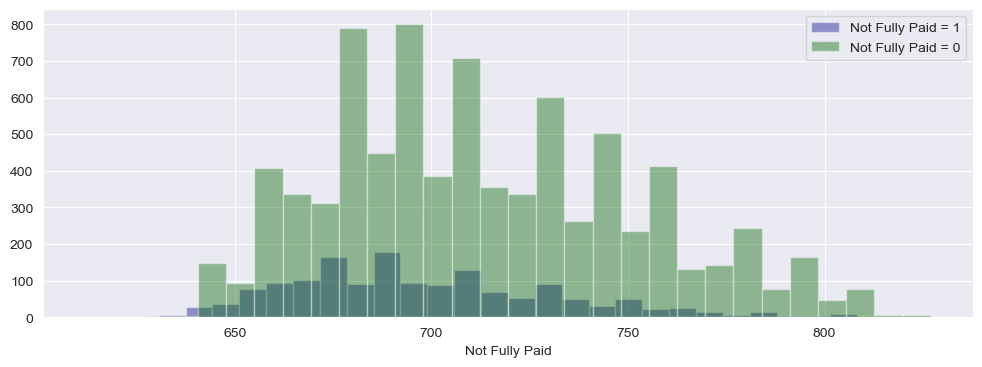

In [194]:
# distribution of status of payment by credit policy

plt.figure(figsize=(12,4))
plt.hist(loans[loans['not.fully.paid']==1]['fico'], color='darkblue', alpha=0.4, bins=30, 
         label='Not Fully Paid = 1')
plt.hist(loans[loans['not.fully.paid']==0]['fico'], color='darkgreen', alpha=0.4, bins=30, 
         label='Not Fully Paid = 0')
plt.xlabel('Not Fully Paid')
plt.legend()

From the above plot, we can see that in this data, there are more number of people not fully paid than fully paid.<br/>
Also, the mean score for both distribution is quite similar.

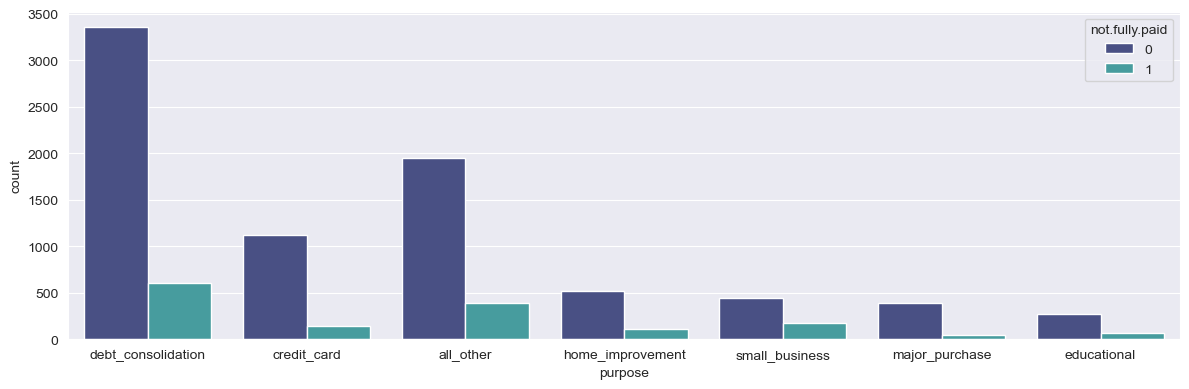

In [195]:
# countplot by purpose

plt.figure(figsize=(12,4))
sns.countplot(x='purpose', hue='not.fully.paid', data=loans, palette='mako')
plt.tight_layout()

From the countplot, we can see that debt consolidation is the main reason to get a loan followed by credit card. <br/>
Plus, not fully paid for all reasons is pretty the same.

<Figure size 1200x400 with 0 Axes>

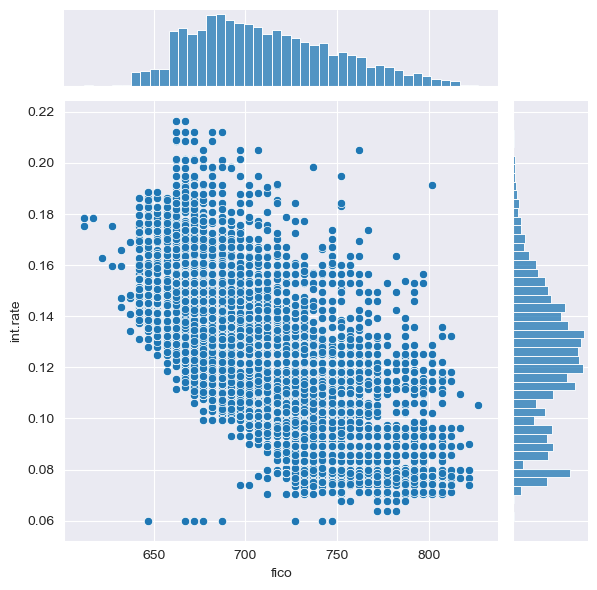

In [196]:
# pairplot FICO vs interest rate

plt.figure(figsize=(12,4))
sns.jointplot(x='fico', y='int.rate', data=loans, palette='mako')

From the plot above, we can say that as the FICO score increases, the interest rate decreases.

<Figure size 1200x400 with 0 Axes>

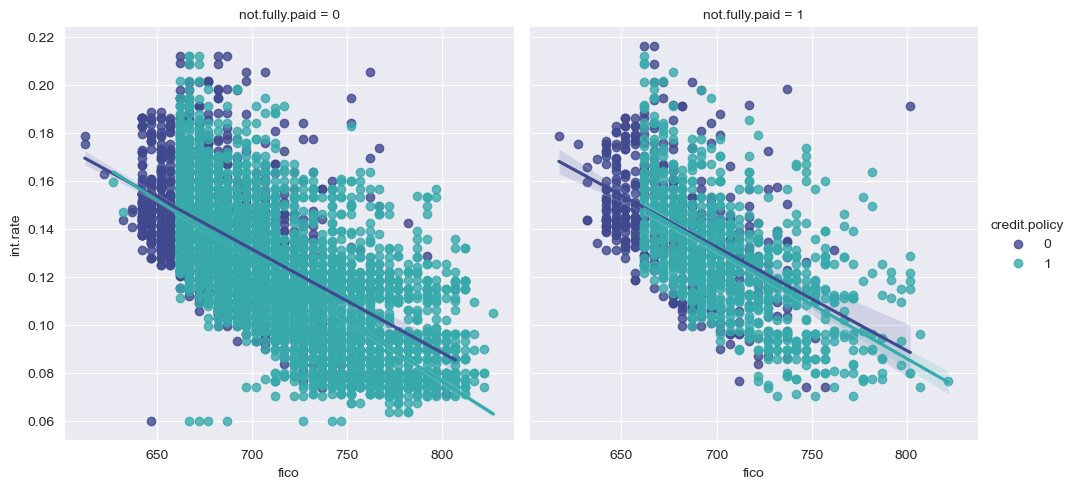

In [197]:
plt.figure(figsize=(12,4))

sns.lmplot(x='fico', y='int.rate', data=loans, hue='credit.policy', col='not.fully.paid', palette='mako')

DATA CLEANING

In [198]:
# convert purpose column into dummy variable
 
purpose = pd.get_dummies(loans['purpose'], drop_first=True)

In [199]:
# remove unused columns

loans.drop('purpose', axis=1, inplace=True)

In [200]:
# merge purpose categorical columns and loans dataframe

loans = pd.concat([loans, purpose], axis=1)

In [201]:
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


TRAINING AND TESTING - DECISION TREE

In [202]:
from sklearn.model_selection import train_test_split

In [203]:
X = loans.drop('not.fully.paid', axis=1)
y = loans['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [204]:
from sklearn.tree import DecisionTreeClassifier

In [205]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

PREDICTIONS DECISION TREE

In [206]:
dtree_predict = dtree.predict(X_test)

EVALUATIONS DECISION TREE

In [207]:
from sklearn.metrics import confusion_matrix, classification_report

In [208]:
print(confusion_matrix(y_test, dtree_predict))
print('\n')
print(classification_report(y_test, dtree_predict))

[[1984  418]
 [ 352  120]]


              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2402
           1       0.22      0.25      0.24       472

    accuracy                           0.73      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.75      0.73      0.74      2874



From the reports above, the accuracy of the report is very low which indicates a bad model. <br/>
Let's try to use Random Forest for this classification.

TRAINING AND TESTING RANDOM FOREST

In [209]:
from sklearn.ensemble import RandomForestClassifier

In [210]:
rfc = RandomForestClassifier(n_estimators=300)

In [211]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

PREDICTIONS OF RANDOM FOREST

In [212]:
rfc_predict = rfc.predict(X_test)

EVALUATIONS OF RANDOM FOREST

In [213]:
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print(classification_report(y_test, rfc_predict))

[[2396    6]
 [ 465    7]]


              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2402
           1       0.54      0.01      0.03       472

    accuracy                           0.84      2874
   macro avg       0.69      0.51      0.47      2874
weighted avg       0.79      0.84      0.77      2874



From above reports, Random Forest also did not perform well for this classification. <br/>
Maybe, we should focus more on the features engineering or try using other methods.